Business Context
This case requires trainees to develop a model for predicting fraudulent transactions for a
financial company and use insights from the model to develop an actionable plan. Data for the
case is available in CSV format having 6362620 rows and 10 columns.
Candidates can use whatever method they wish to develop their machine learning model.
Following usual model development procedures, the model would be estimated on the
calibration data and tested on the validation data. This case requires both statistical analysis and
creativity/judgment. We recommend you spend time on both fine-tuning and interpreting the
results of your machine learning model.


1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

so now let's implement the code for the above problem

In [8]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



Pre processing

In [10]:
# Loading the data
df=pd.read_csv('Fraud.csv')

In [17]:
# shape,head and tail of the data
df.shape

(6362620, 11)

In [19]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


In [21]:
df.tail(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362520,735,TRANSFER,417103.68,C336307904,417103.68,0.0,C1155915285,0.00,0.00,1,0
6362521,735,CASH_OUT,417103.68,C1450763584,417103.68,0.0,C1377830519,34232.06,451335.75,1,0
6362522,735,TRANSFER,92735.71,C1351323617,92735.71,0.0,C413722554,0.00,0.00,1,0
6362523,735,CASH_OUT,92735.71,C786761311,92735.71,0.0,C570188819,921583.30,1014319.01,1,0
6362524,735,TRANSFER,123146.28,C1625883009,123146.28,0.0,C918154390,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [27]:
#now lets get the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


1.NOW lets perform data cleaning and find missing values and outliers

In [33]:
df.isnull().values.any()

False

In [35]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

we can see there are no null values .

In [38]:
## detect missing values in the given series object. 
## It return a boolean same-sized object indicating if the values are NA. 
## Missing values gets mapped to True and non-missing value gets mapped to False 
df.isna().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [40]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

The isFraud column is often used as the label (dependent variable) when training 
machine learning models to detect fraud.
isFraud = 1: This usually means that the transaction is fraudulent.
isFraud = 0: This means that the transaction is legitimate (non-fraudulent)

In [42]:
df.isFraud.value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

isFlaggedFraud is another binary variable that typically indicates whether a transaction has been flagged as potentially fraudulent by some predefined rules or a system.
isFlaggedFraud = 1: The transaction has been flagged as suspicious or potentially
fraudulent by some automated detection system or set of rules.
isFlaggedFraud = 0: The transaction has not been flagged as suspicious by the system.

In [47]:
df.isFlaggedFraud.value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [53]:
dfisFraud = df.loc[df.isFraud == 1]
dfisFraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.0,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.0,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.0,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.0,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.00,1,0


In [55]:
dfflagfraud=df.loc[df.isFlaggedFraud == 1]
dfflagfraud.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


<Axes: xlabel='count', ylabel='type'>

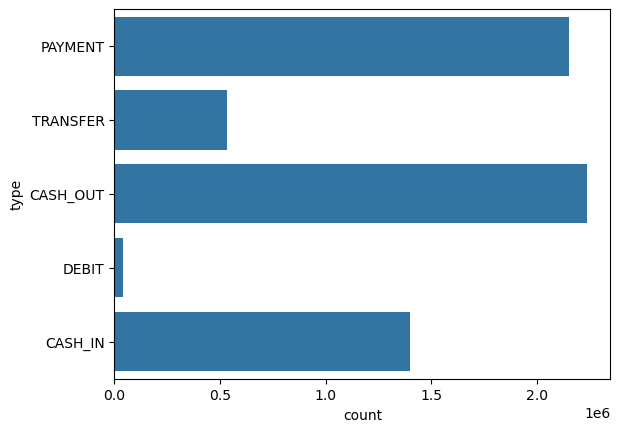

In [66]:
#for discrete data
sns.countplot(df.type)

Label encoder
#converting categorical features to numerical

In [77]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [79]:
df.type=label.fit_transform(df.type)

In [84]:
df.nameOrig=label.fit_transform(df.nameOrig)
df.nameDest=label.fit_transform(df.nameDest)

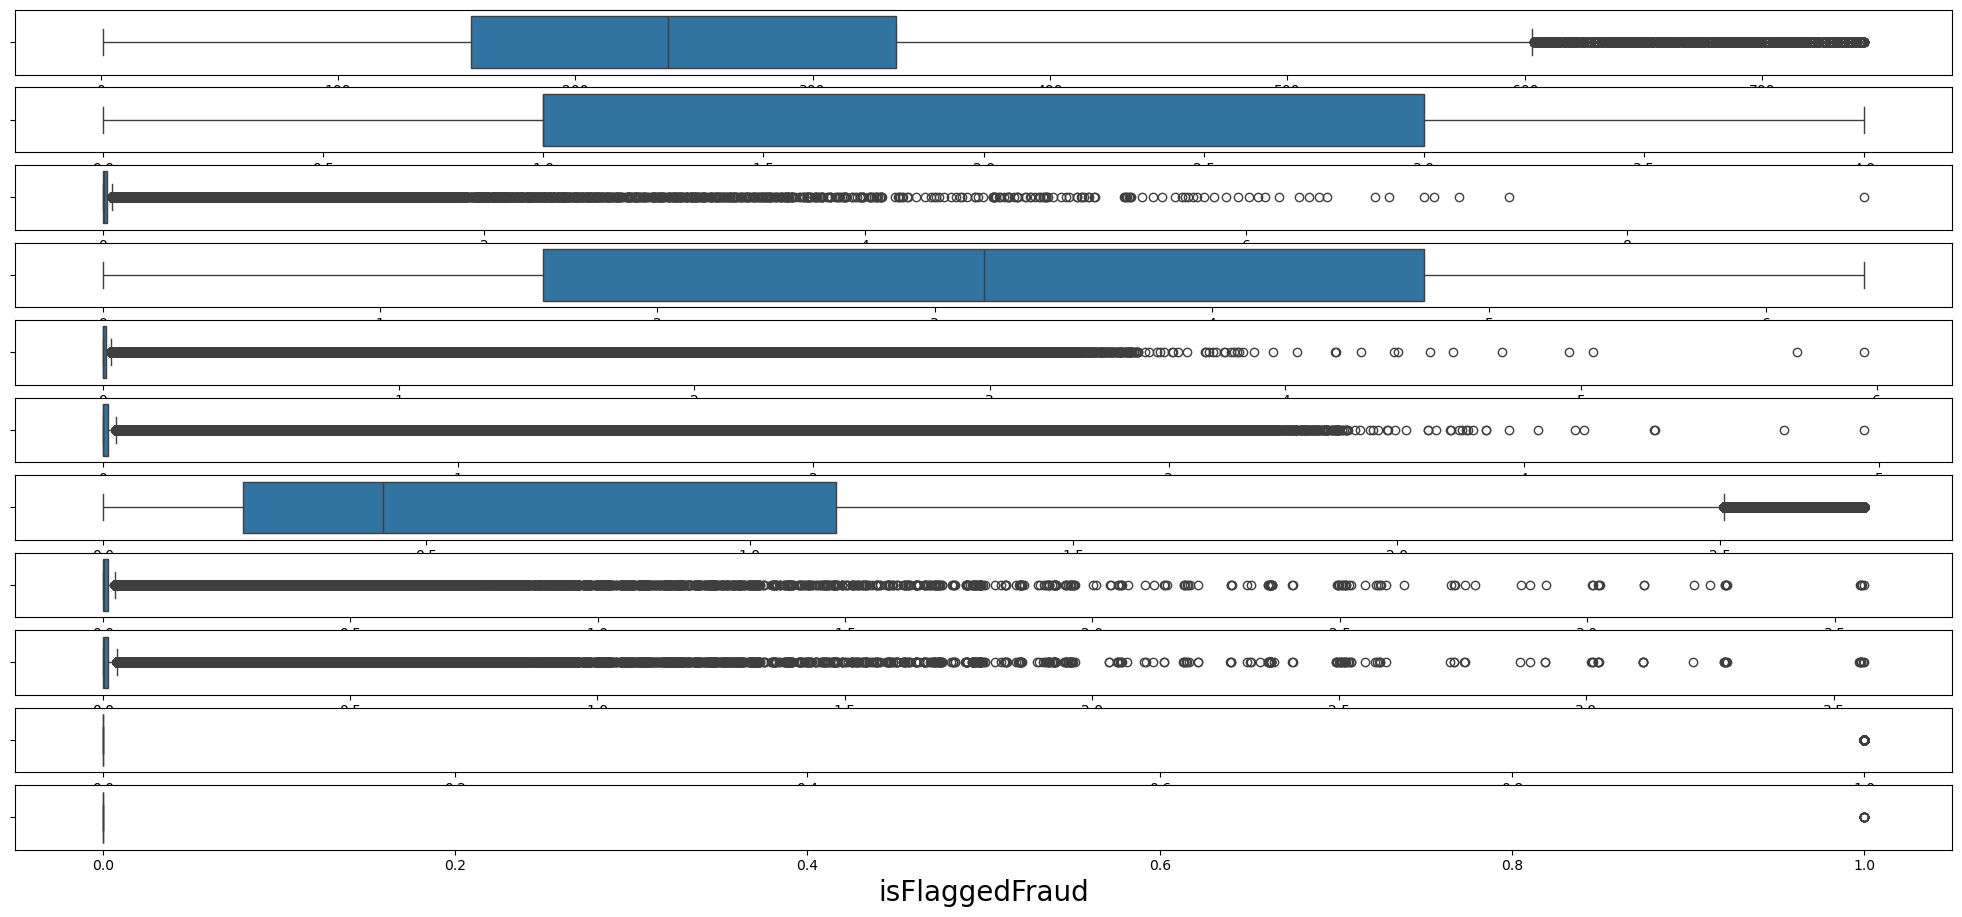

In [88]:
## checking the outliers if any
## outliers detection can be normally plotted using boxplot
box=df[['step', 'type', 'amount', 'nameOrig', 
          'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']]
plt.figure(figsize=(25,25), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=25 :     
        ax = plt.subplot(25,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [94]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.0,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.0,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.0,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.0,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.0,0.00,0,0
5,1,3,7817.71,6026525,53860.00,46042.29,2247218,0.0,0.00,0,0
6,1,3,7107.77,1805947,183195.00,176087.23,2063363,0.0,0.00,0,0
7,1,3,7861.64,2999171,176087.23,168225.59,2314008,0.0,0.00,0,0
8,1,3,4024.36,869140,2671.00,0.00,768940,0.0,0.00,0,0
9,1,2,5337.77,5407276,41720.00,36382.23,282960,41898.0,40348.79,0,0


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB


Feature Selection

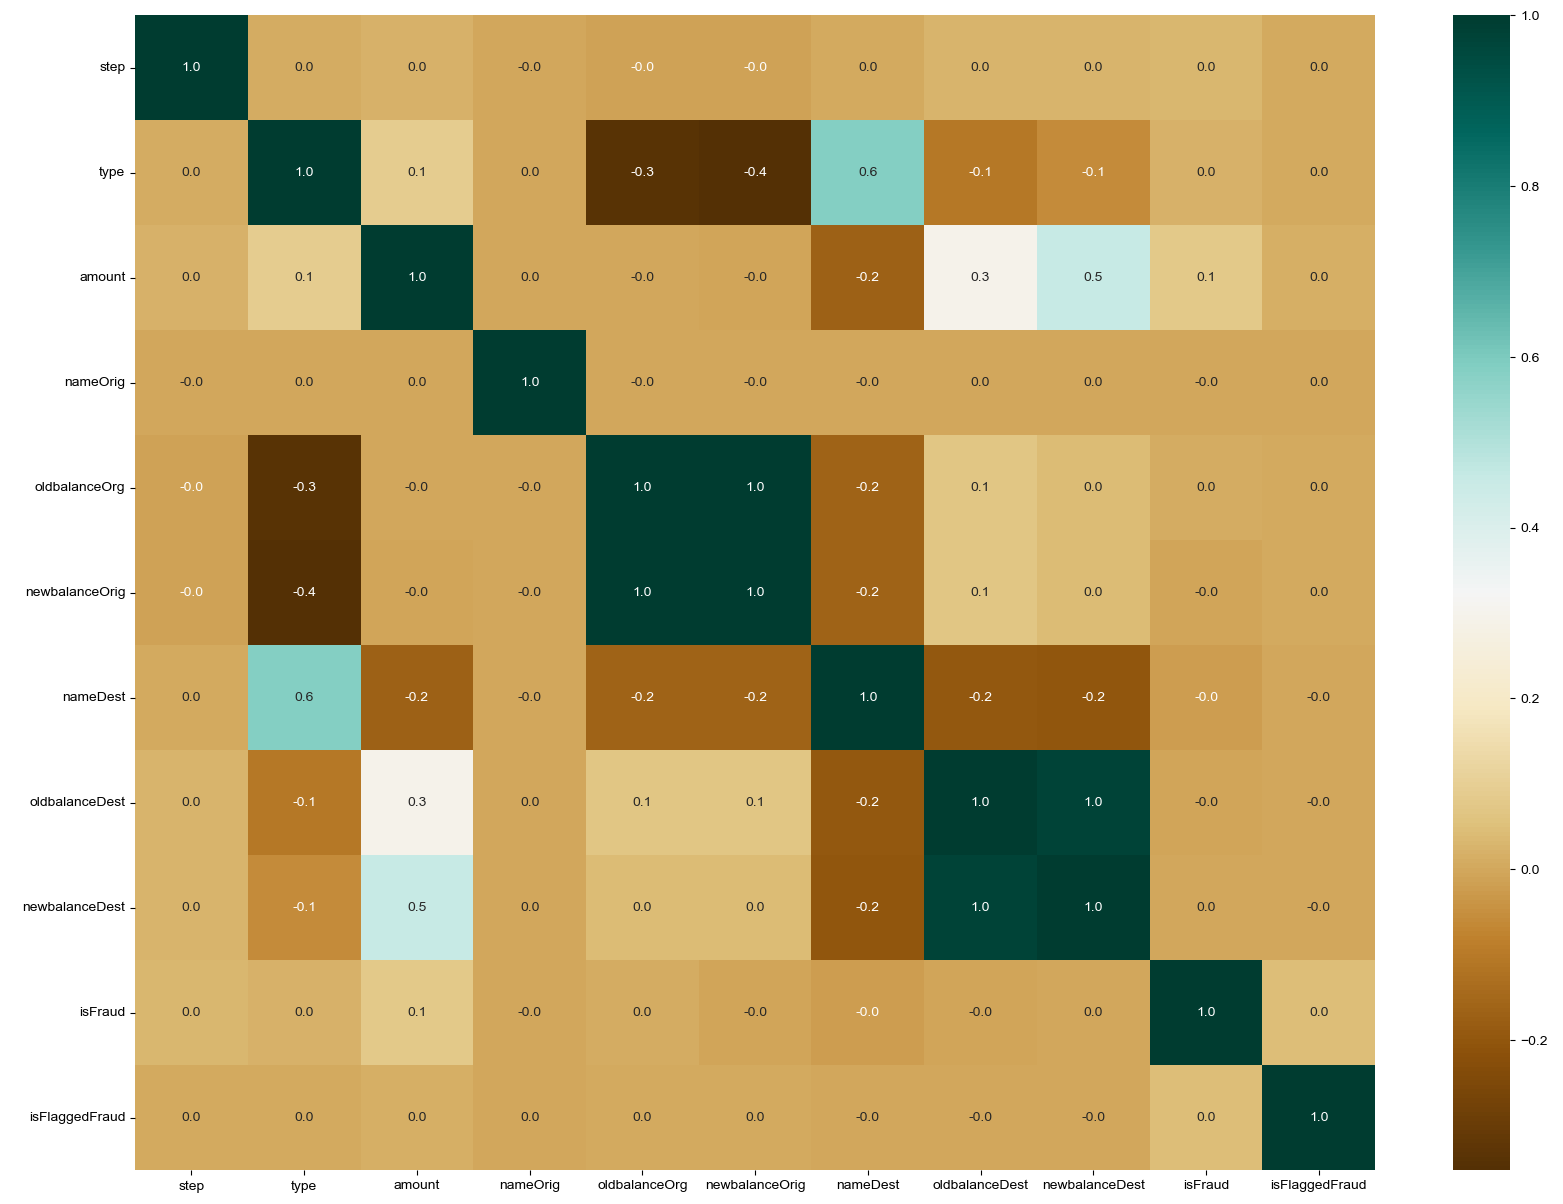

In [102]:
##cmap stands for colormap and it's a colormap instance or registered colormap name
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt= '.1f', cmap="BrBG")
sns.set(font_scale=2.25)
plt.show()

In [106]:
## displays the correlated data 
corr_matrix = df.corr()
corr_matrix["isFlaggedFraud"].sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
type              0.002685
nameOrig          0.000667
oldbalanceDest   -0.000513
newbalanceDest   -0.000529
nameDest         -0.001122
Name: isFlaggedFraud, dtype: float64

2.Describe your fraud detection model in elaboration
there are two models i.e., random forest and decision tree
Here we use Decision tree because it is widely used for data modeling, especially in tasks like fraud detection, because they are highly effective in classification and regression problems

3. How did you select variables to be included in the model?
Selecting the right variables (features) for a model is a critical step in building an effective fraud detection system. The variables selected are based on checking correlation btw target variable with remaining variable

Model Building 

In [110]:
#creating independent and dependent variables X & y
X = df.loc[:,['isFraud','amount','oldbalanceOrg','newbalanceOrig','step','type','nameOrig']]
y = df.isFlaggedFraud

In [114]:
X.head(10)

,isFraud,amount,oldbalanceOrg,newbalanceOrig,step,type,nameOrig
0,0,9839.64,170136.00,160296.36,1,3,757869
1,0,1864.28,21249.00,19384.72,1,3,2188998
2,1,181.00,181.00,0.00,1,4,1002156
3,1,181.00,181.00,0.00,1,1,5828262
4,0,11668.14,41554.00,29885.86,1,3,3445981
5,0,7817.71,53860.00,46042.29,1,3,6026525
6,0,7107.77,183195.00,176087.23,1,3,1805947
7,0,7861.64,176087.23,168225.59,1,3,2999171
8,0,4024.36,2671.00,0.00,1,3,869140
9,0,5337.77,41720.00,36382.23,1,2,5407276


In [116]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: isFlaggedFraud, dtype: int64

In [170]:
#4
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [122]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [126]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4453834, 7), (1908786, 7), (4453834,), (1908786,))

In [144]:
from scipy.stats import skew
from scipy.stats import kurtosis

why skew and kurtosis is used because:
Skewness: In a fraud detection dataset, the transaction amounts might be positively skewed because the majority of legitimate transactions are small in size, while a few fraudulent transactions involve unusually large amounts.
Kurtosis: The dataset might have high kurtosis because there are only a few fraudulent 
transactions, but they represent extreme values, making the distribution "heavy-tailed."
Both are crucial in identifying outliers, guiding data transformations, and improving model performance

isFraud
769.7023761366951


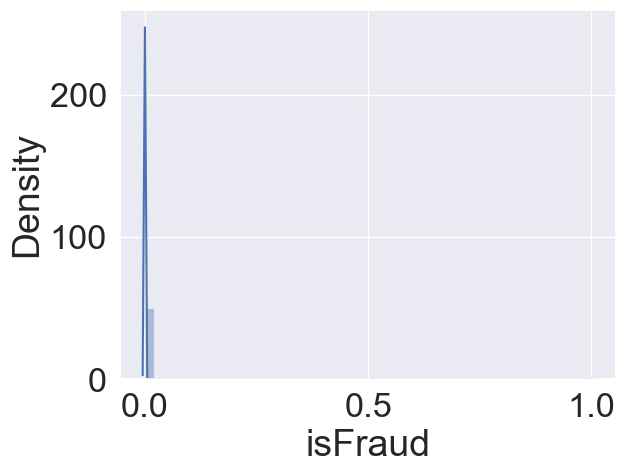

amount
1797.9552914598337


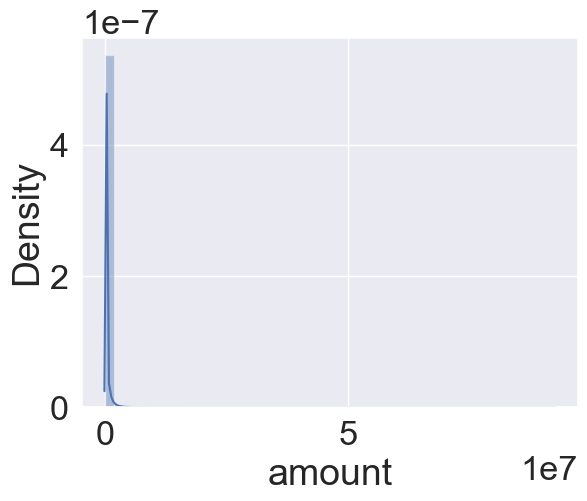

oldbalanceOrg
32.9648516960387


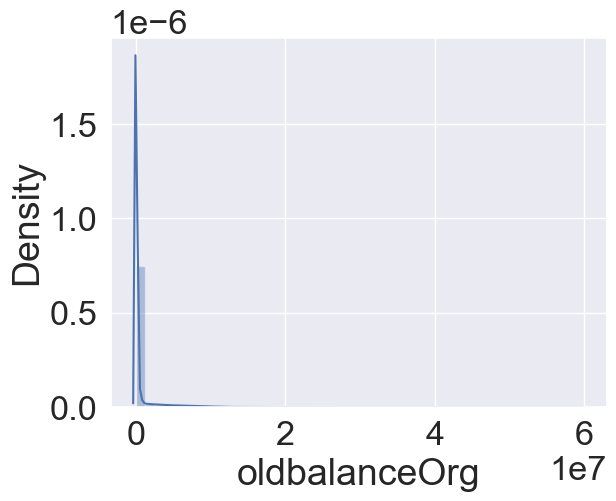

newbalanceOrig
32.06695841776864


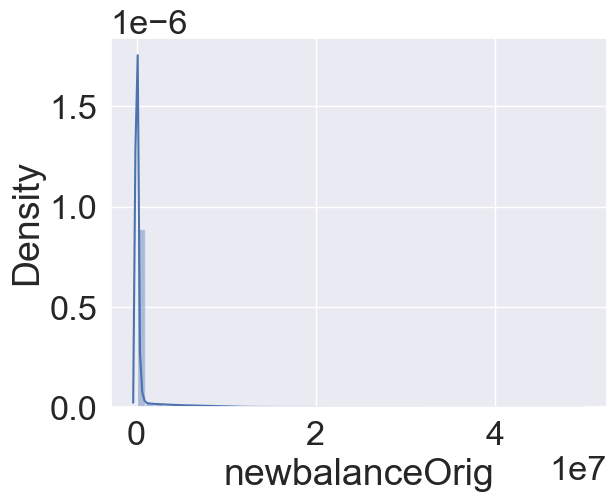

step
0.3290693534211582


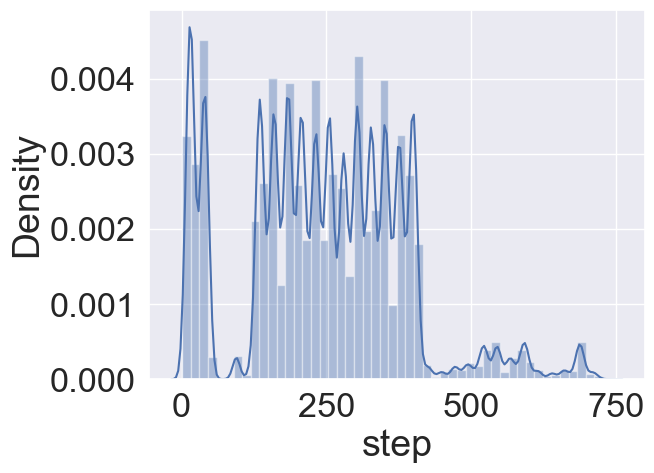

type
-1.4345763413580779


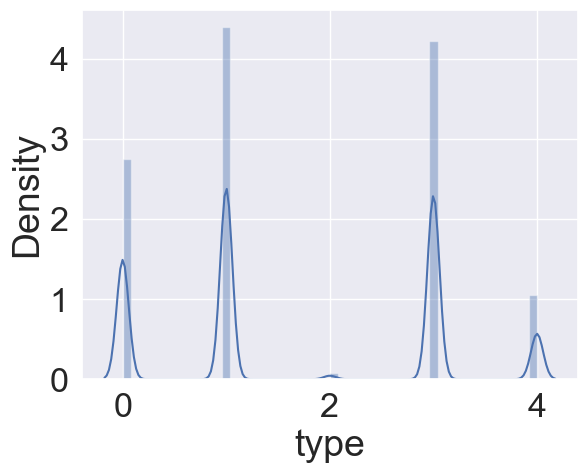

nameOrig
-1.2000279621839782


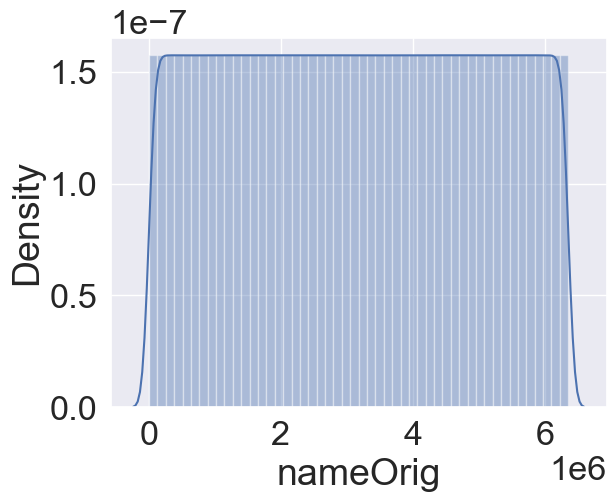

In [148]:
for col in X_train:
    print(col)
    print(kurtosis(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

Using Decision Tree 

In [150]:
from sklearn.tree import DecisionTreeRegressor

In [152]:
dtree=DecisionTreeRegressor(max_depth=25)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=25)

In [154]:
dtree.score(X_train, y_train)

1.0

In [156]:
dtree.score(X_test, y_test)

0.7142846664954787

In [158]:
p_test = dtree.predict(X_test)


In [160]:
def mae(p, t):
    return np.sum(np.abs(p - t)) / len(p)

In [162]:
mae(p_test, y_test)

1.0477863940745583e-06

In [164]:
def print_score(mm):
    print("train r^2 " + str(mm.score(X_train, y_train)))
    print("validation r^2 " + str(mm.score(X_test, y_test)))
    p_test = mm.predict(X_test)
    p_train = mm.predict(X_train)
    print("mean absolute error(Train): " + str(mae(p_train, y_train)))
    print("mean absolute error(Validation): " + str(mae(p_test, y_test)))
print_score(dtree)

train r^2 1.0
validation r^2 0.7142846664954787
mean absolute error(Train): 0.0
mean absolute error(Validation): 1.0477863940745583e-06


In [166]:
p_test = dtree.predict(X_test)

In [168]:
p_test

array([0., 0., 0., ..., 0., 0., 0.])

5. What are the key factors that predict fraudulent customer?

In this fraud detection there are many key factors some are Transaction amount, Location of the transaction and time of the transaction, transaction Frequency.

6. Do these factors make sense? If yes, How? If not, How not?

Yes, the factors mentioned above do make sense in predicting fraudulent customers because they reflect key patterns and behaviors commonly associated with fraud.

Transaction Amount :Fraudsters often try to withdraw or transfer large sums of money quickly before the fraud is detected. In Real-world relevance,Banks and payment systems flag transactions that are significantly larger than the customer's usual spending as potentially fraudulent.This factor directly captures the risk of abnormally large transactions.

Location of the Transaction: Legitimate customers usually make transactions from familiar locations. When fraud occurs, it’s often done from a different country or region, either by the fraudster directly or through a proxy to conceal their location.

Time of Transaction:Fraudsters often make transactions late at night or during off-hours when customers are less likely to notice or respond to suspicious activity. Customers usually follow consistent patterns in the timing of their transactions.

Transaction Frequency:Multiple rapid transactions could indicate that a fraudster is trying to quickly move funds or make purchases before the account is locked. Legitimate customers generally spread out their transactions, while fraudsters often operate quickly to avoid detection.

7.Prevention Measures to Adopt While Updating Infrastructure

I think to prevent fraud while updating infrastructure, implementing Multi-Factor Authentication (MFA) to secure access, utilize real-time fraud monitoring systems with AI-driven analytics to detect suspicious transactions instantly, as personal information is very important so ensuring data encryption to protect sensitive information is important.

8. Assuming these actions have been implemented, how would you determine if they work?

By monitoring key performance indicators (KPIs) such as the reduction in fraudulent transactions, the number of unauthorized access attempts blocked by MFA, and the response time of real-time fraud monitoring systems.if these actions are implemented, i think it will work better than present situation.